0.0889365199374
1.47774408519


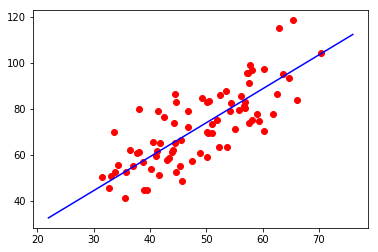

In [1]:
from numpy import *

#https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png
def squared_sum_error(b, m, points):
    error_sum = 0
    N = float(len(points))

    for i in range (len(points)):
        xi = points[i, 0]
        yi = points[i, 1]
        error_sum += (1/N) * (yi - (m * xi + b)) **2

    return error_sum

#https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png
def step_gradient(b, m, points, learning_rate):
    grad_b = 0
    grad_m = 0
    N = float(len(points))

    for i in range (len(points)):
        xi = points[i,0]
        yi = points[i, 1]
        grad_m -= (2/N) *  xi * (yi - ((m * xi) + b))
        grad_b -= (2/N) * (yi - ((m * xi) + b))

    adjusted_m = m - (learning_rate * grad_m)
    adjusted_b = b - (learning_rate * grad_b)
    return [adjusted_b, adjusted_m]


def gradient_descent_runner(points, start_b, start_m, learning_rate, it):
    b = start_b
    m = start_m

    for i in range(it):
       b,m = step_gradient(b, m, points, learning_rate)
    return [b, m]


def run():
    points = genfromtxt('data.csv', delimiter =',')
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    [b,m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print(b)
    print(m)

    max_x = float('-inf')
    min_x = float('inf')

    for i in range(len(points)):
        xi = points[i,0]
        if (xi > max_x):
            max_x = xi
        if (xi < min_x):
            min_x = xi

    max_x = int(max_x * 1.1)
    min_x = int(min_x * 0.9)

    f_x = []
    f_y = []

    for i in range(min_x, max_x):
        y = (m * i) + b
        f_x.append(i)
        f_y.append(y)

    data = genfromtxt('data.csv', delimiter=',', skip_header=10, skip_footer=10, names=['x','y'])

    import matplotlib.pyplot as plt
    plt.plot(data['x'], data['y'], linestyle='None', marker='o', color='r')
    plt.plot(f_x, f_y, color='b')
    plt.show()



if __name__ == '__main__':
    run()